In [ ]:
import pandas as pd
!pip install git+https://github.com/RJT1990/pyflux
import pyflux as pf
from datetime import datetime

  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-98yill29
  Running command git clone -q https://github.com/RJT1990/pyflux /tmp/pip-req-build-98yill29
  Created wheel for pyflux: filename=pyflux-0.4.17-cp37-cp37m-linux_x86_64.whl size=5271840 sha256=7a86f800451e924524017fd98231fe31ac48389b9fa03720f637ff31b5034f32
  Stored in directory: /tmp/pip-ephem-wheel-cache-deaq5zzg/wheels/e3/32/60/635f09bc86f7163ce989cb1158ddbbc044f310333c24788004
Successfully built pyflux


In [8]:
base_url="https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/";

data_train_a = pd.read_csv(base_url+'cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv(base_url+'cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)

data_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


Text(0.5, 1.0, 'CPU Utilization')

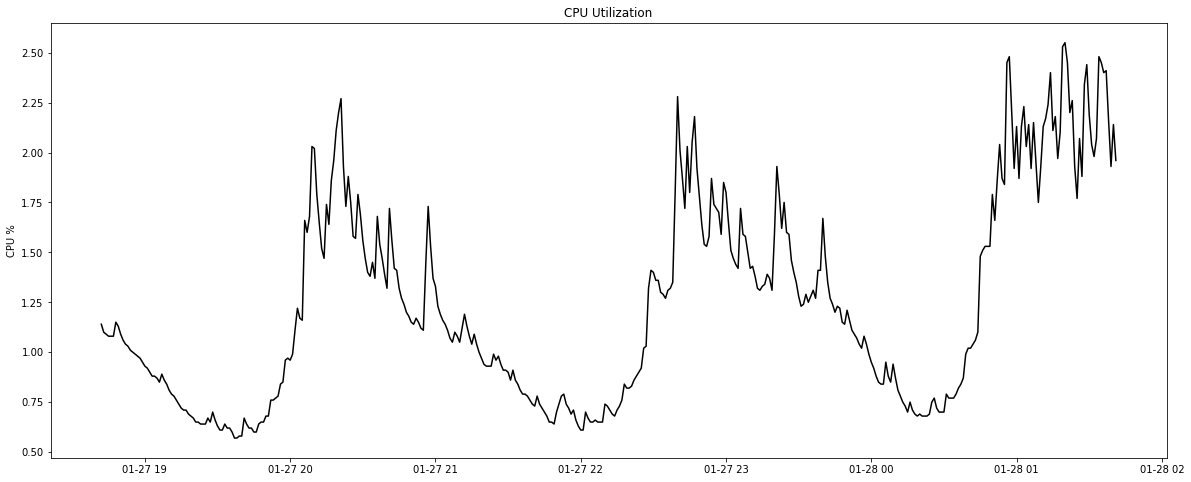

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

In [12]:
model_a = pf.ARIMA(data=data_train_a, ar=11, ma=11, integ=0, target='cpu')
x = model_a.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.0589
Acceptance rate of Metropolis-Hastings is 0.30665

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.39505


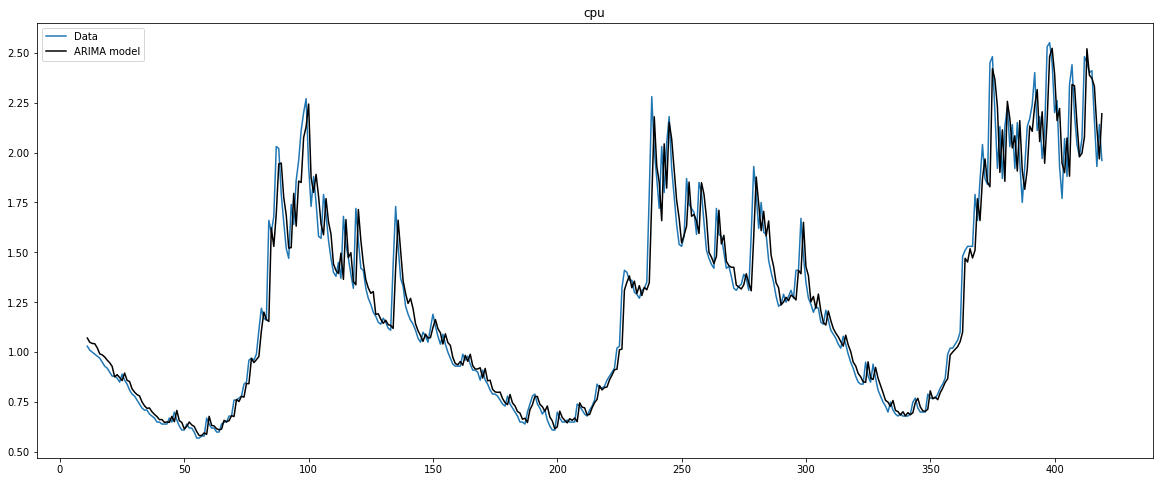

In [13]:
model_a.plot_fit(figsize=(20,8))

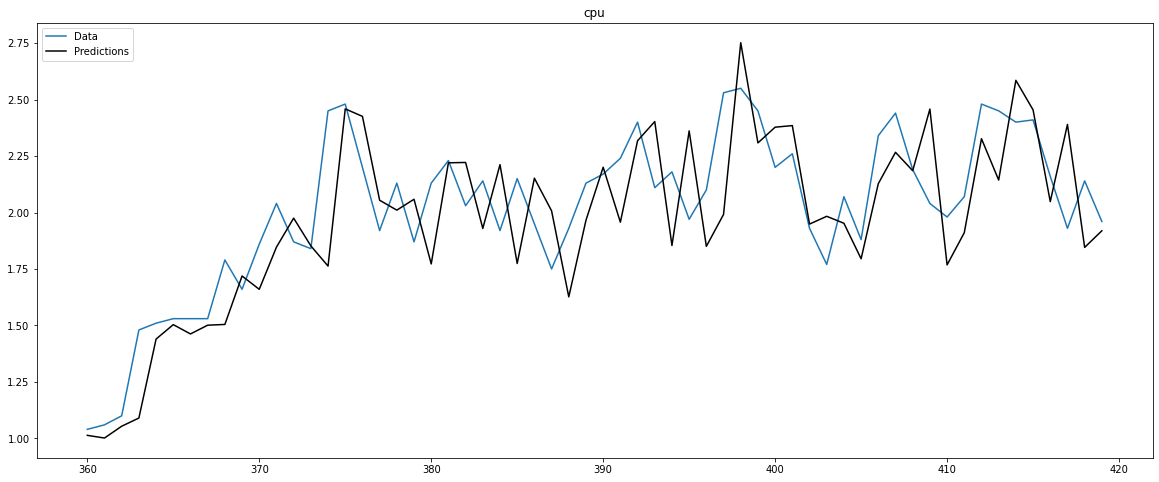

In [14]:
model_a.plot_predict_is(h=60, figsize=(20,8))

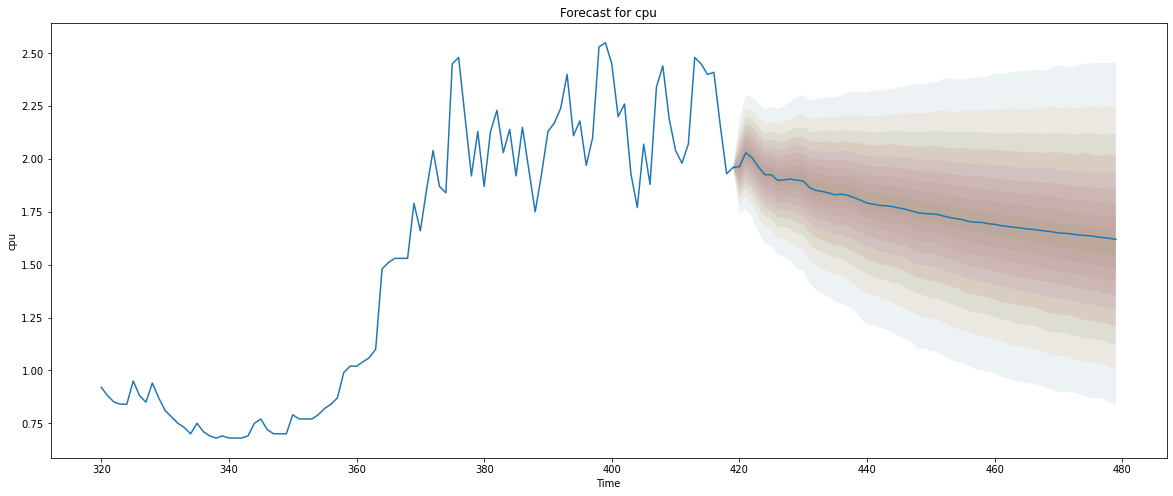

In [15]:
model_a.plot_predict(h=60,past_values=100,figsize=(20,8))

Text(0.5, 1.0, 'CPU Utilization')

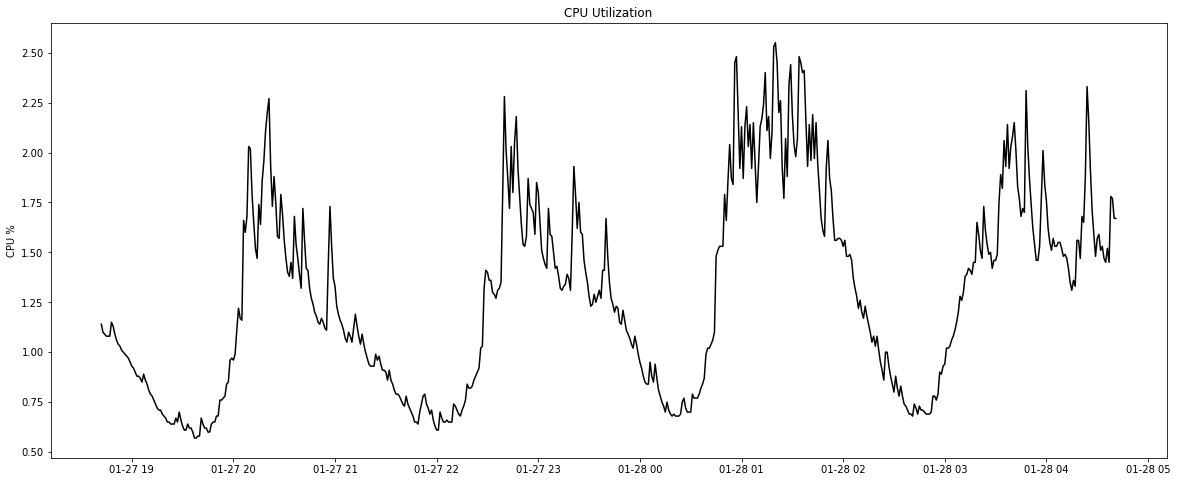

In [16]:
data_train_b = pd.read_csv(base_url+'cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True)
data_test_b = pd.read_csv(base_url+'cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True)
plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

In [17]:
model_b = pf.ARIMA(data=data_train_b, ar=11, ma=11, integ=0, target='cpu')
x = model_b.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.03795
Acceptance rate of Metropolis-Hastings is 0.2597

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.1268
Acceptance rate of Metropolis-Hastings is 0.17905
Acceptance rate of Metropolis-Hastings is 0.1859
Acceptance rate of Metropolis-Hastings is 0.3035


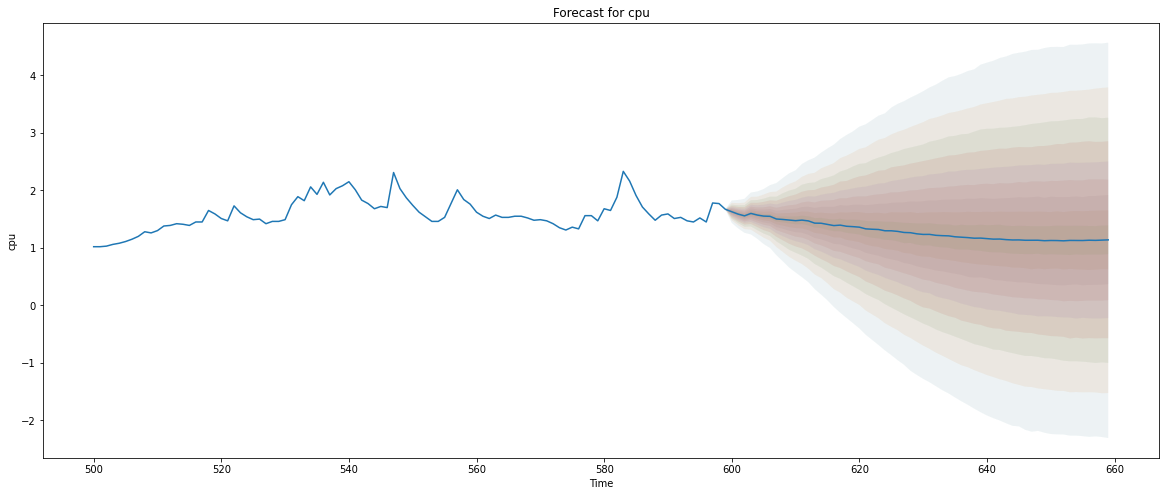

In [18]:
model_b.plot_predict(h=60,past_values=100,figsize=(20,8))